In [79]:
import pandas as pd
df = pd.read_excel('data_full_sekres.xlsx')

In [80]:
df.loc[df['operationId'] == 100, 'operationId'] = 10

In [141]:
df['load'] = df['thrusterAndPropulsion'] + df['hotelLoad']

<AxesSubplot:xlabel='datetime'>

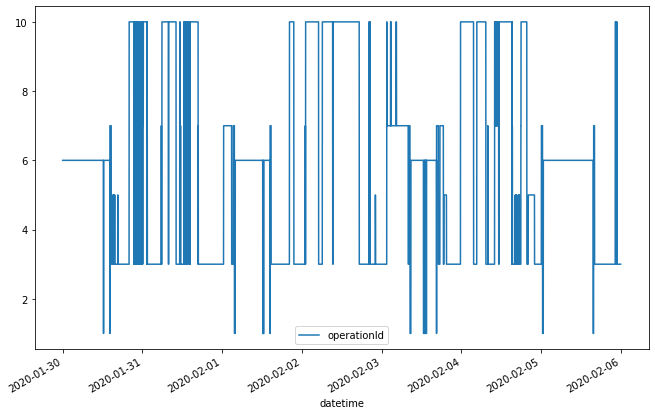

In [81]:
df.plot('datetime', 'operationId', figsize=(11,7))

# Plotter thruster load og batteri for oversikt

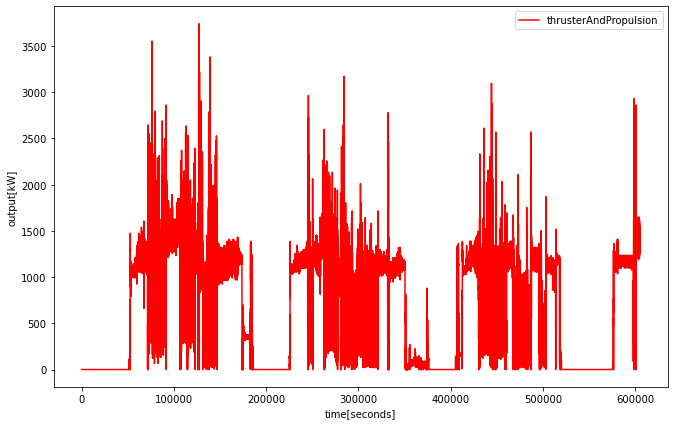

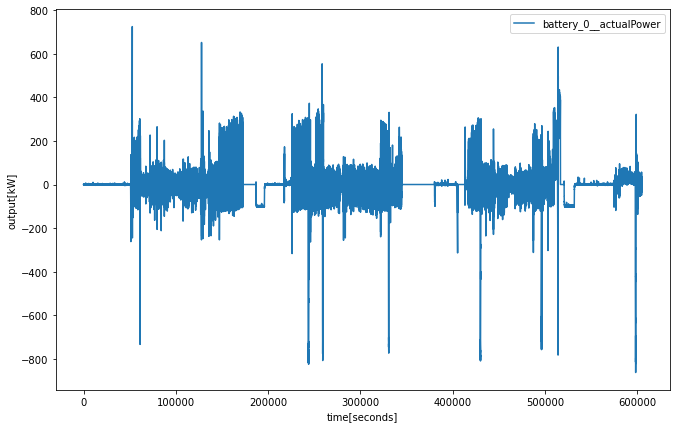

In [82]:
import matplotlib.pyplot as plt
df['index'] = df.index
df.plot('index', 'thrusterAndPropulsion', figsize=(11,7), color='red')
plt.xlabel('time[seconds]')
plt.ylabel('output[kW]')
plt.savefig('t&p_full')
df.plot('index', 'battery_0__actualPower', figsize=(11,7))
plt.xlabel('time[seconds]')
plt.ylabel('output[kW]')
plt.savefig('battery_full')

# Lager SOC-kolonne

In [117]:
import numpy as np

bat = df['battery_0__actualPower'].values
soc = np.zeros(604800)
socpros = np.zeros(604800)
soc[0] = 496
socpros[0] = 80
for i in range(len(soc)):
    if i == 0:
        pass
    elif i > 0:
        soc[i] = soc[i-1] - bat[i]/3600
        socpros[i] = soc[i]/620*100
df['soc'] = soc
df['soc %'] = socpros

# Plotter SOC

88.57142857142857


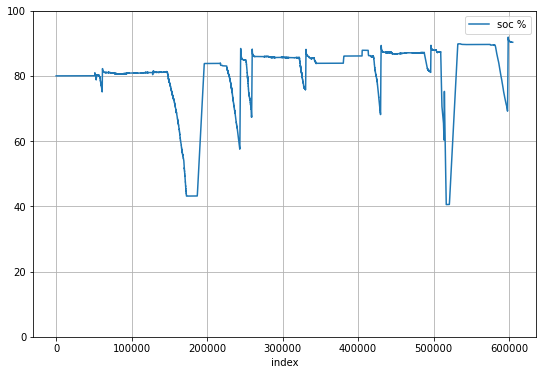

In [118]:
df.plot('index', 'soc %', figsize=(9,6))
plt.ylim(0,100)
plt.grid()
eff = 100*(496/560)
print(eff)

# DAG 1: Første utseiling fra Mongstad ( 5.5 timer, ca 52500 - 72000)

- Bruker 1 DG første halvdel, bytter over til 2, lader i 6-7 min og fortsetter
- Topplading og stor oscillering i batteri med 1 DG
- Den høye peaken i batteri er den vi har brukt som eksempel, hvor batteriet hindrer ramp up av ny DG 

<AxesSubplot:xlabel='index'>

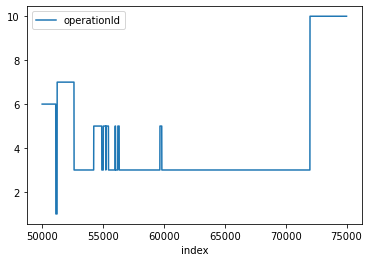

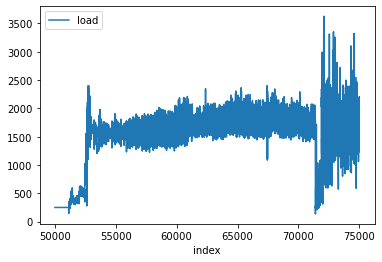

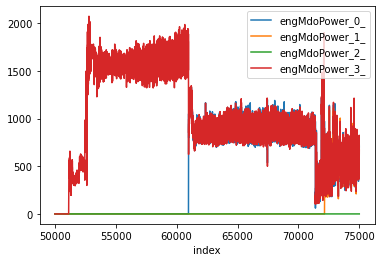

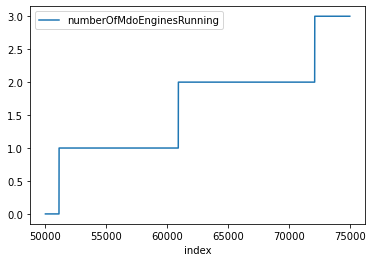

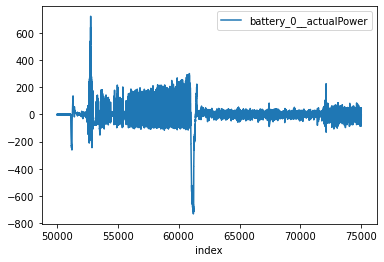

In [142]:
df[50000:75000].plot('index', 'operationId')

df[50000:75000].plot('index', 'load')

df[50000:75000].plot('index', ['engMdoPower_0_', 'engMdoPower_1_', 'engMdoPower_2_', 'engMdoPower_3_'])

df[50000:75000].plot('index', 'numberOfMdoEnginesRunning')

df[50000:75000].plot('index', 'battery_0__actualPower')

# DAG 1: DP ved platform (antar vi), (5 timer, 72000-91000)

- OPID varierer en del, 9700 sek i DP, 9400 sek i standby og 2700 sek i transit.
- Load, DG og batteri er ganske lik hele perioden
    - 3 DG i de to lengre segmentene med DP, DG SOM SPINNING RESERVE?.
    - 2 DG i tiden med variasjon mellom DP og standby, BATTERI SOM SPINNING RESERVE? Her måtte de vel brukt en DG hele perioden hvis de ikke hadde hatt batteri eller rampet generator veldig ofte. 

<AxesSubplot:xlabel='index'>

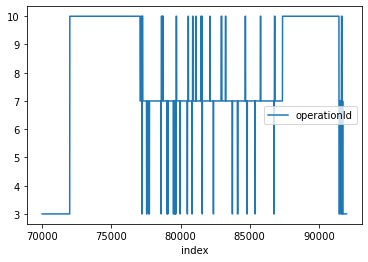

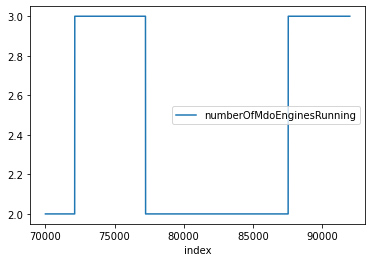

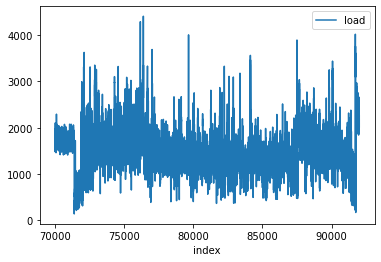

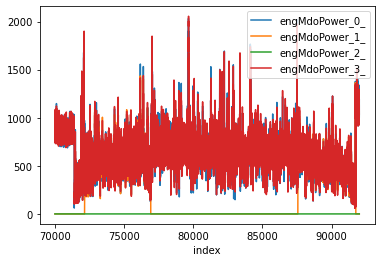

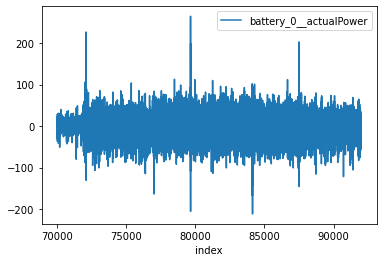

In [143]:
df[70000:92000].plot('index', 'operationId')

df[70000:92000].plot('index', 'numberOfMdoEnginesRunning')

df[70000:92000].plot('index', 'load')

df[70000:92000].plot('index', ['engMdoPower_0_', 'engMdoPower_1_', 'engMdoPower_2_', 'engMdoPower_3_'])

df[70000:92000].plot('index', 'battery_0__actualPower')

# DAG 2: Seiling fra platform til platform (nesten 5 timer, 92000-108000)
- 2 DG hele tiden
- Batteri brukes omtrent ikke, konstant +- 50 kW

<AxesSubplot:xlabel='index'>

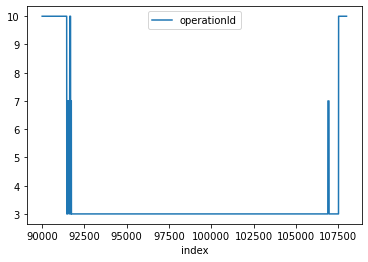

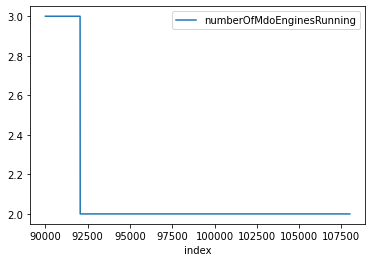

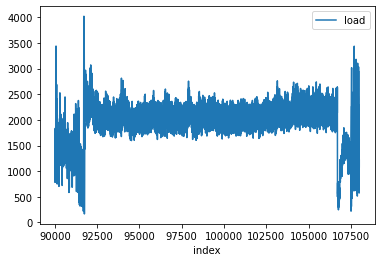

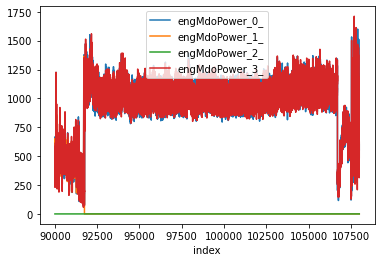

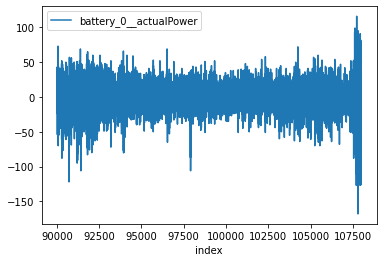

In [144]:
df[90000:108000].plot('index', 'operationId')

df[90000:108000].plot('index', 'numberOfMdoEnginesRunning')

df[90000:108000].plot('index', 'load')

df[90000:108000].plot('index', ['engMdoPower_0_', 'engMdoPower_1_', 'engMdoPower_2_', 'engMdoPower_3_'])

df[90000:108000].plot('index', 'battery_0__actualPower')

# DAG 2: DP ved platform (4 timer, 107500-122500)
- 3 DG hele veien, ingen batteri som spinning reserve

<AxesSubplot:xlabel='index'>

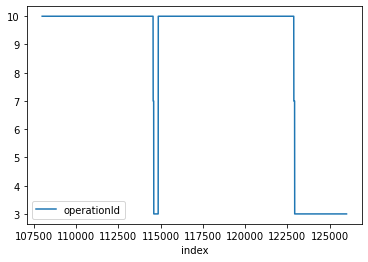

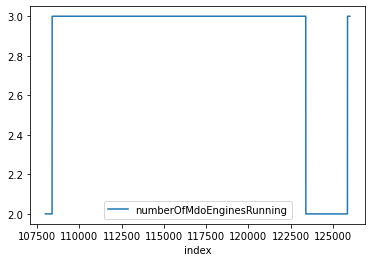

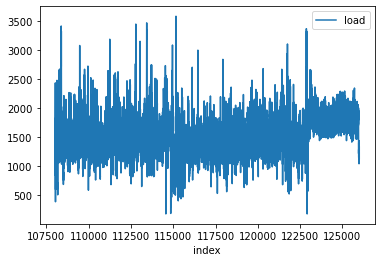

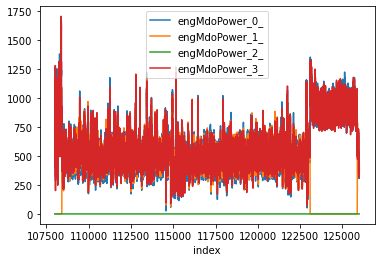

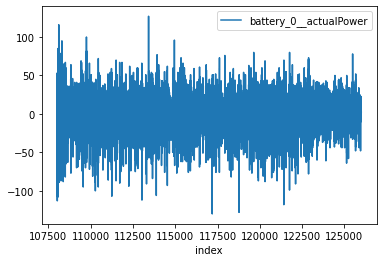

In [145]:
df[108000:126000].plot('index', 'operationId')

df[108000:126000].plot('index', 'numberOfMdoEnginesRunning')

df[108000:126000].plot('index', 'load')

df[108000:126000].plot('index', ['engMdoPower_0_', 'engMdoPower_1_', 'engMdoPower_2_', 'engMdoPower_3_'])

df[108000:126000].plot('index', 'battery_0__actualPower')

# DAG 2: Seiling fra platform til platform (3 timer, 122000-132000)
- En feil i datasettet på antall DG, vist nedenfor
- Liten tur innom DP uten batteri som SR

<AxesSubplot:xlabel='index'>

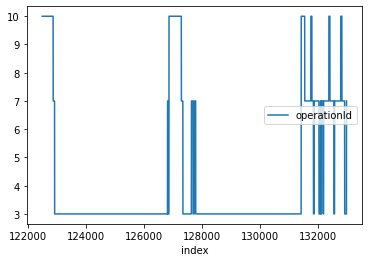

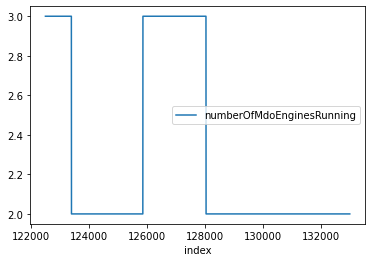

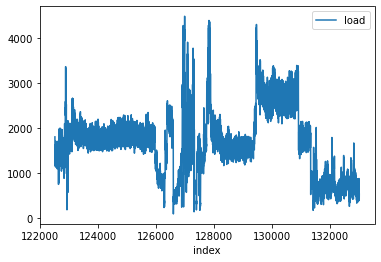

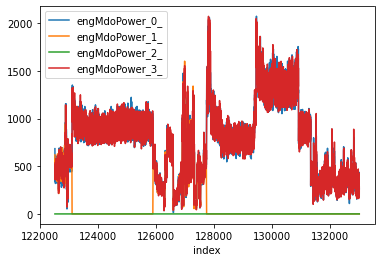

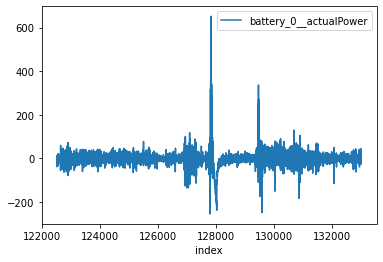

In [146]:
df[122500:133000].plot('index', 'operationId')

df[122500:133000].plot('index', 'numberOfMdoEnginesRunning')

df[122500:133000].plot('index', 'load')

df[122500:133000].plot('index', ['engMdoPower_0_', 'engMdoPower_1_', 'engMdoPower_2_', 'engMdoPower_3_'])

df[122500:133000].plot('index', 'battery_0__actualPower')

# Feil i datasett: DG1 ramper ned, men numberOfEnginesRunning forblir 3

<AxesSubplot:xlabel='index'>

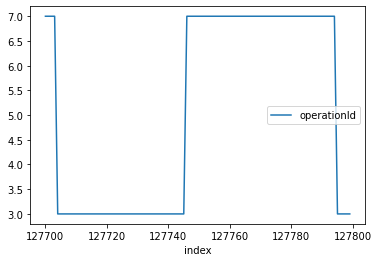

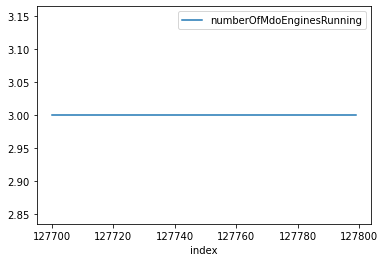

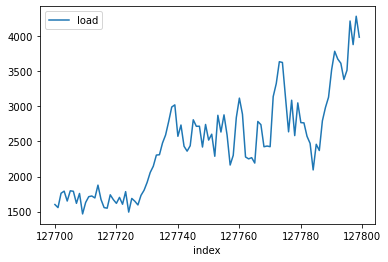

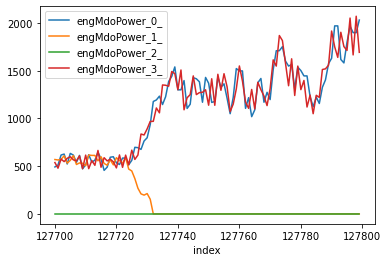

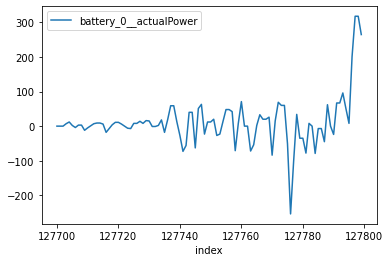

In [158]:
df[127700:127800].plot('index', 'operationId')

df[127700:127800].plot('index', 'numberOfMdoEnginesRunning')

df[127700:127800].plot('index', 'load')

df[127700:127800].plot('index', ['engMdoPower_0_', 'engMdoPower_1_', 'engMdoPower_2_', 'engMdoPower_3_'])

df[127700:127800].plot('index', 'battery_0__actualPower')

# DAG 2: DP ved platform (4,5 timer, 131000-147500)
- Samme som forrige gang, 2 DG mens operation mode varierer og stort sett 3 DG under lengre perioder med DP.

<AxesSubplot:xlabel='index'>

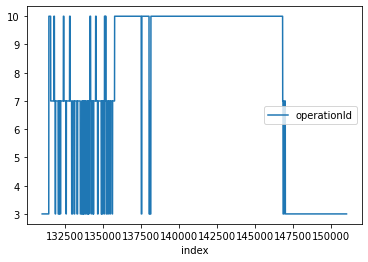

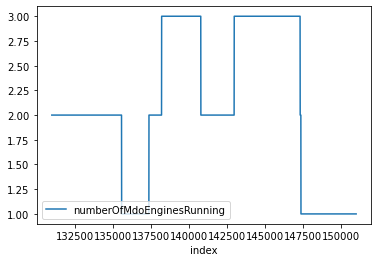

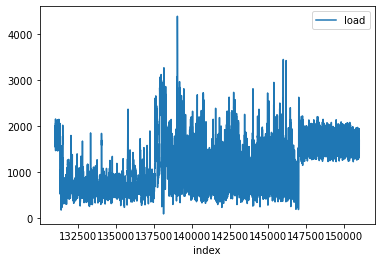

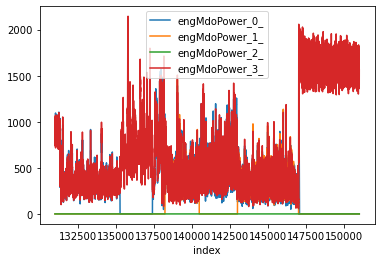

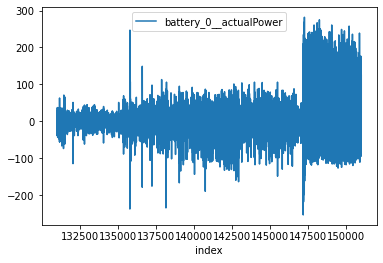

In [159]:
df[131000:151000].plot('index', 'operationId')

df[131000:151000].plot('index', 'numberOfMdoEnginesRunning')

df[131000:151000].plot('index', 'load')

df[131000:151000].plot('index', ['engMdoPower_0_', 'engMdoPower_1_', 'engMdoPower_2_', 'engMdoPower_3_'])

df[131000:151000].plot('index', 'battery_0__actualPower')

# DAG 2: Seilas tilbake til Mongstad (7,5 timer (147000:175000)
- 1 DG + batteri hele veien
- Bruker opp batteriet helt opp siden de skal tilbake til havn og lade
- Samme som vanlig, oscillerende. Gjennomsnittsoutput 27 kW

<AxesSubplot:xlabel='index'>

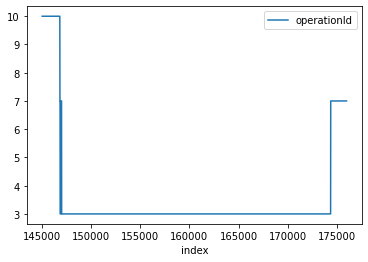

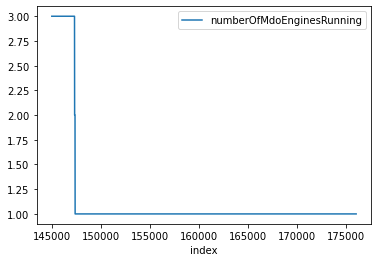

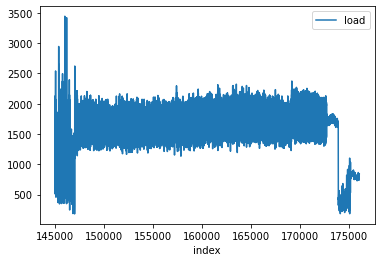

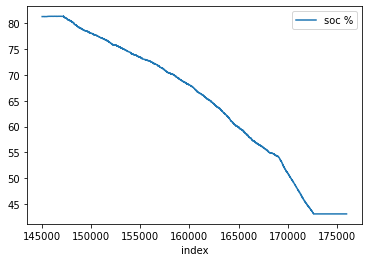

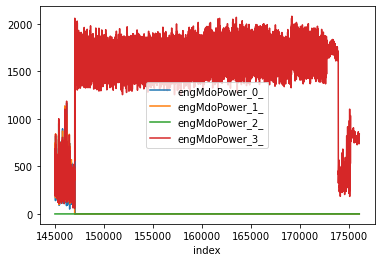

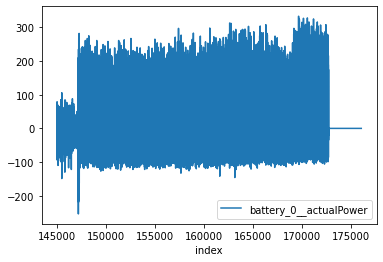

In [165]:
df[145000:176000].plot('index', 'operationId')

df[145000:176000].plot('index', 'numberOfMdoEnginesRunning')

df[145000:176000].plot('index', 'load')

df[145000:176000].plot('index', 'soc %')

df[145000:176000].plot('index', ['engMdoPower_0_', 'engMdoPower_1_', 'engMdoPower_2_', 'engMdoPower_3_'])

df[145000:176000].plot('index', 'battery_0__actualPower')

26.995266666666666


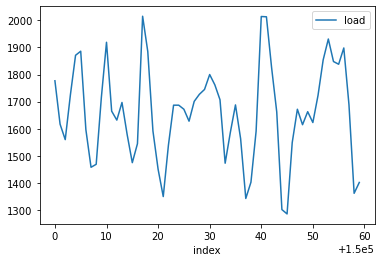

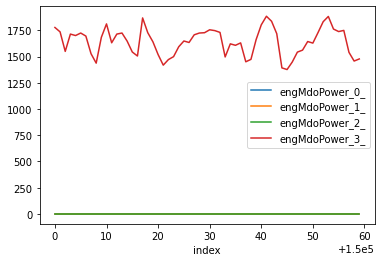

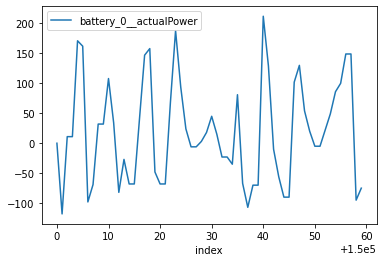

In [169]:
df[150000:150060].plot('index', 'load')

df[150000:150060].plot('index', ['engMdoPower_0_', 'engMdoPower_1_', 'engMdoPower_2_', 'engMdoPower_3_'])

df[150000:150060].plot('index', 'battery_0__actualPower')

batt = df['battery_0__actualPower'][150000:165000].mean()
print(batt)